# Pima Indians Diabetes Database Descriptive Statistics Project

Predict the onset of diabetes based on diagnostic measures. This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether a patient has diabetes, based on certain diagnostic measurements included in the dataset.

Columns of the dataset
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration 2 hours in an oral glucose tolerance test
- Blood Pressure: Diastolic blood pressure (mm Hg)
- Skin Thickness: Triceps skin fold thickness (mm
- Insulin: 2-Hour serum insulin (mu U/ml)
- BMI: Body mass index (weight in kg/(height in m)^2) 
- Diabetes Pedigree Function: Diabetes pedigree function
- Age: Age (years)
- Outcome: Class variable (0 or 1) 0 mean non-diabetic and 1 means diabetic.

1.Please do the basic exploration of data and explain missing values, number of rows and columns and data types in statistical term.

2.Calculate appropriate measures of central tendency for Glucose and outcome column only?

3.Please provide 5 points data summaries for required columns?

4.Please create an appropriate plot to examine the relationship between Age and Glucose.

5.Please create an appropriate plot to see the distribution of Outcome variable?

6.Please examine the distribution of numerical data and explain which variable normally distributed and which variable is seems to be skewed. Please also tell the direction of skewness.

7.Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed.

8.Please create appropriate plot to examine the outliers of these variables. Please name the variables which have outliers.

9.What should be the measures of central tendency and dispersion for skewed data?  

10.Please push the assignment into your github account and provide the link of github account.

In [2]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Read the dataset
df=pd.read_csv('diabetes.csv')
df[:3]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


## 1. Please do the basic exploration of data and explain missing values, number of rows and columns and data types in statistical term.

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**No null values in given dataset**

In [5]:
df.size

6912

In [6]:
df.shape

(768, 9)

##### The dataset contain 768 number of rows and 6 columns

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


#### **Total 9 Columns are present**
###### -  Out of which 2 are *float64* and 7 are *int64* datatype

In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### **Here I can obeversed that** 

###### - **'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI','DiabetesPedigreeFunction', 'Age' are continuous type of variables**


###### - **Outcome column is categorial type of variable with values '0' & '1'**


###### - **Similarly Glucose, BloodPressure, SkinThickness, Insulin and BMI columns having values minimum value '0' which should not**


###### - **Hence I replace this values with np.nan**

In [7]:
# Find zero values in df.
(df == 0).sum(axis=0)

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

In [8]:
lst=['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']
for i in lst:
    df[i].replace(0,np.nan,inplace=True)

In [9]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [10]:
# Replace null values by mean
lst=['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']
for i in lst:
    df[i].replace(np.nan,df[i].mean(),inplace=True)

In [11]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## 2.Calculate appropriate measures of central tendency for Glucose and outcome column only?

### Measures of central tendency
1. Mean
2. Mode
3. Median
4. Variance
5. Standard deviation
6. Skewness

In [39]:
print("Central Tendency of Glucose is :")
df_glucose=df['Glucose'].describe()
df_glucose['median']=df['Glucose'].median()
df_glucose['variance']=df_glucose['std']**2
df_glucose['skew']=df['Glucose'].skew()

print(df_glucose.round(2))

Central Tendency of Glucose is :
count       768.00
mean        121.69
std          30.44
min          44.00
25%          99.75
50%         117.00
75%         140.25
max         199.00
median      117.00
variance    926.35
skew          0.53
Name: Glucose, dtype: float64


In [40]:
print("Central Tendency of Outcome is :")

df_outcome=df['Outcome'].describe()
df_outcome['median']=df['Outcome'].median()
df_outcome['variance']=df_outcome['std']**2
df_outcome['skew']=df['Outcome'].skew()

print(df_glucose.round(2))

Central Tendency of Outcome is :
count       768.00
mean        121.69
std          30.44
min          44.00
25%          99.75
50%         117.00
75%         140.25
max         199.00
median      117.00
variance    926.35
skew          0.53
Name: Glucose, dtype: float64


## **3. Please provide 5 points data summaries for required columns?**

In [41]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,8.790942,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.202592,29.153420,155.548223,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.548223,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 4. Please create an appropriate plot to examine the relationship between Age and Glucose.

Text(0.5, 1.0, 'Age_vs-Glucose')

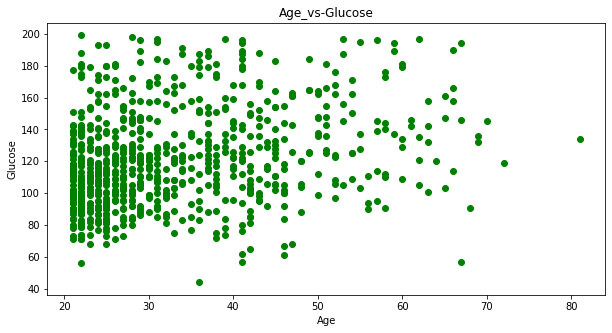

In [20]:
plt.figure(figsize=(10,5))
plt.scatter(df['Age'],df['Glucose'],color="g")
plt.xlabel("Age")
plt.ylabel("Glucose")
plt.title('Age_vs-Glucose')

## 5. Please create an appropriate plot to see the distribution of Outcome variable?

In [46]:
df['Outcome'].unique()

array([1, 0], dtype=int64)

**1 - Diabetic**

**2 - Non Diabetic**

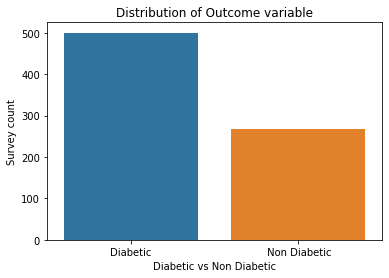

In [48]:
#df_glucose.mode()
#sns.set_theme(style="darkgrid")
sns.countplot(x= "Outcome", data = df).set(xticklabels=["Diabetic", " Non Diabetic"])
plt.xlabel("Diabetic vs Non Diabetic")
plt.ylabel("Survey count")
plt.title("Distribution of Outcome variable")
plt.show()

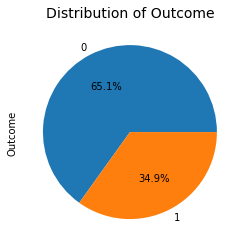

In [56]:
#groupby the data by delivery type
data = df.groupby("Outcome")["Outcome"].count()
data
data.plot.pie(autopct="%.1f%%");
plt.title("Distribution of Outcome", fontsize=14);

## 6. Please examine the distribution of numerical data and explain which variable normally distributed and which variable is seems to be skewed. Please also tell the direction of skewness.

In [68]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

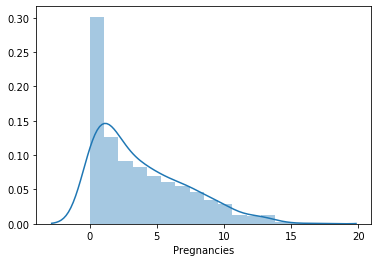

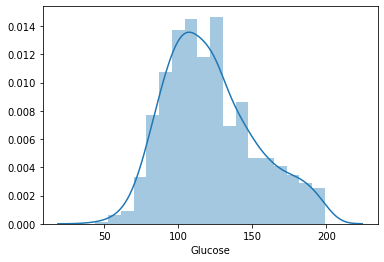

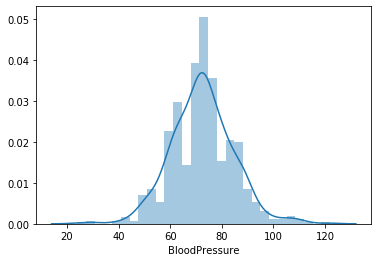

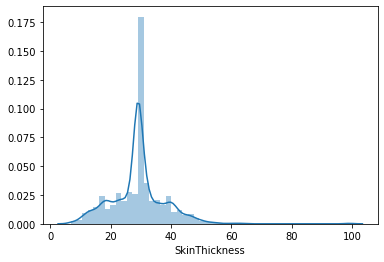

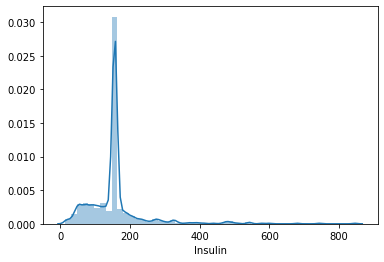

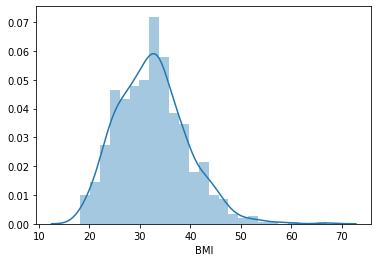

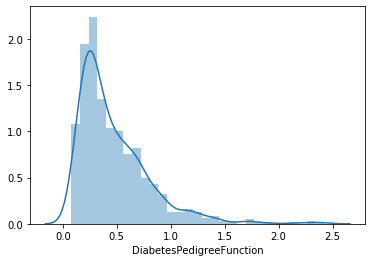

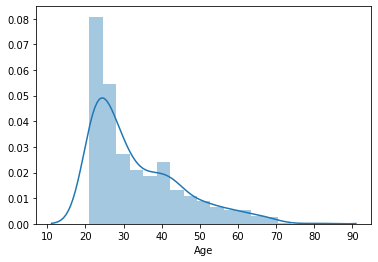

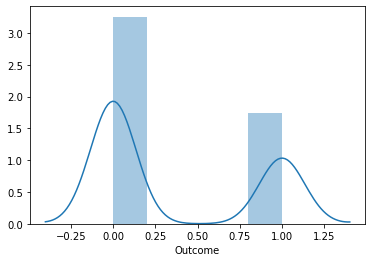

In [70]:
for i in df:
    sns.distplot(df[i])
    plt.show()

1. Pregnancies is right skewed
2. Glucose is moderately skewed
3. Blood pressure is normally distributed
4. Skin thickness is right skewed
5. Insulin and count is right skewed
6. BMI is moderately skewed
7. Diabetes pedigreefunction is also right skewed
8. Age is right skewed


## 7. Please calculate the skewness value and divide variables into symmetrical, moderately skewed and highly skewed.

# Skewness
- -0.5 to +0.5 Symmteric data
- -1 to -0.5 and 0.5 to 1 Modoraivly Skew
- less than -1 & greater then +1

In [73]:
for i in df:
    df_skew[i]=df[i].skew()
df_skew

Insulin                     3.019084
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Pregnancies                 0.901674
SkinThickness               0.822173
Outcome                     0.635017
BMI                         0.598253
Glucose                     0.532719
BloodPressure               0.137305
dtype: float64

## 8. Please create appropriate plot to examine the outliers of these variables. Please name the variables which have outliers.

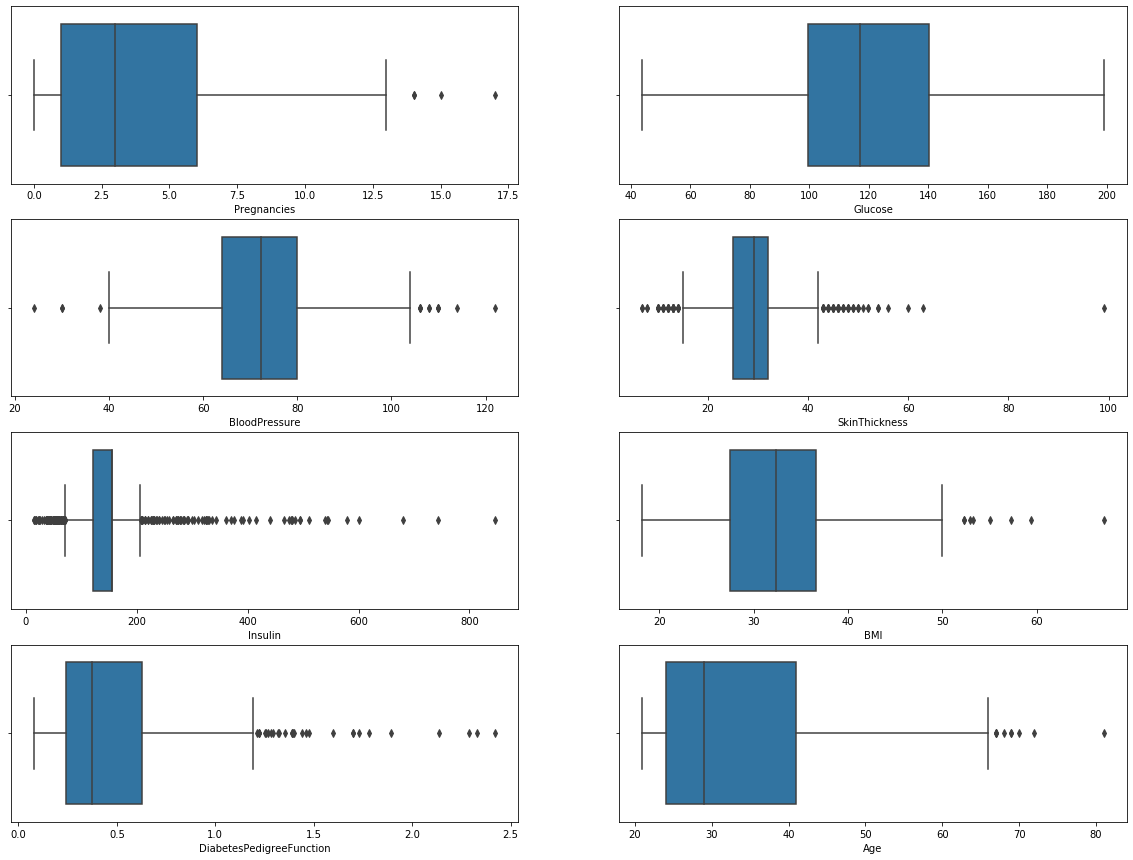

In [85]:
plt.figure(figsize = (20,15))
#for i,col in enumerate(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin','BMI', 'DiabetesPedigreeFunction', 'Age']):
for i,col in enumerate(df.columns[:-1]):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = col, data = df)
plt.show()

##### With the help of Box plot can  identify the outliers present in following variables 
- Pregnanicies
- Blood pressure
- Age
- Skin thickness
- Insulin
- BMI
- DiabetespedigreeFunction
- Age 

## 9. What should be the measures of central tendency and dispersion for skewed data?

In [111]:
from scipy.stats import iqr
lst=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']
nlst=['Pregnancies               ','Glucose                   ','Blood Pressure            ','Skin Thickness            ','Insulin			  ','BMI                       ','Diabetes Pedigree Function','Age                       ',]

print(f"\t\t\t    Mean \tMedian  \tVariance \tStd \t IQR \t Skew \t Count \t Min \tMax")
a=0
for i in lst:
  print(f"{nlst[a]} = {round(df[i].mean(),2)}\t{round(df[i].median(),2)} \t\t{round(df[i].var(),2)}\t\t{round(df[i].std(),2)} \t{round(iqr(df[i]),2)} \t{round(df[i].skew(),2)} \t{df[i].count()} \t{df[i].min()}\t{df[i].max()}")
  a=a+1

			    Mean 	Median  	Variance 	Std 	 IQR 	 Skew 	 Count 	 Min 	Max
Pregnancies                = 3.85	3.0 		11.35		3.37 	5.0 	0.9 	768 	0	17
Glucose                    = 121.69	117.0 		926.35		30.44 	40.5 	0.53 	768 	44.0	199.0
Blood Pressure             = 72.41	72.2 		146.32		12.1 	16.0 	0.14 	768 	24.0	122.0
Skin Thickness             = 29.15	29.15 		77.28		8.79 	7.0 	0.82 	768 	7.0	99.0
Insulin			   = 155.55	155.55 		7228.59		85.02 	34.05 	3.02 	768 	14.0	846.0
BMI                        = 32.46	32.4 		47.27		6.88 	9.1 	0.6 	768 	18.2	67.1
Diabetes Pedigree Function = 0.47	0.37 		0.11		0.33 	0.38 	1.92 	768 	0.078	2.42
Age                        = 33.24	29.0 		138.3		11.76 	17.0 	1.13 	768 	21	81
